<a href="https://colab.research.google.com/github/forminju/2022-Bigcontest/blob/main/0219_1___smartfactory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
!pip install pytorch-tabnet==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=76d3d67dfc7ea4b993813e3d6a1167d5b86f842ae4da999769e7827a76fced61
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [5]:
from pytorch_tabnet.tab_model import TabNetClassifier

import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

import pandas as pd
import numpy as np
np.random.seed(0)

import os
import wget
from pathlib import Path
import random

from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
import os
import random
import time
import pickle
import psutil
import gc


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import KFold, StratifiedKFold

import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.metrics import Metric

# setting some globl config

plt.style.use('ggplot')
orange_black = [
    '#fdc029', '#df861d', '#FF6347', '#aa3d01', '#a30e15', '#800000', '#171820'
]
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams["figure.facecolor"] = '#FFFACD'
plt.rcParams["axes.facecolor"] = '#FFFFE0'
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.color"] = orange_black[3]
plt.rcParams["grid.alpha"] = 0.5
plt.rcParams["grid.linestyle"] = '--'


import warnings
warnings.filterwarnings("ignore")

INFERENCE = True

In [7]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [8]:
def seed_everything(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    
    if torch.cuda.is_available(): 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
        
seed_everything(42)

In [9]:
%cd /content/drive/MyDrive/스마트공장

/content/drive/MyDrive/스마트공장


# Data Load

In [10]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [11]:
train_x = train_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP', 'Y_Class','Y_Quality'])
train_y = train_df['Y_Class']

test_x = test_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])

## Data Pre-processing

In [12]:
X_group = train_x.loc[:,'X_1':]

# 결측치 처리

In [13]:
train_x.drop(['X_3','X_4','X_6','X_10','X_14','X_19','X_26','X_27','X_28','X_29','X_30','X_31','X_32','X_33','X_34','X_35','X_36','X_37','X_67','X_68','X_69','X_70','X_71','X_72','X_74','X_75','X_76','X_77','X_78','X_79','X_80','X_81','X_82','X_83','X_84','X_85','X_89','X_91','X_92','X_93','X_96','X_100','X_104','X_108','X_112','X_116','X_122','X_135','X_142','X_147','X_154','X_158','X_162','X_166','X_170','X_174','X_178','X_182','X_186','X_187','X_188','X_190','X_191','X_192','X_193','X_194','X_195','X_232','X_234','X_235','X_239','X_241','X_244','X_249','X_252','X_255','X_259','X_260','X_264','X_274','X_278','X_282','X_312','X_313','X_314','X_315','X_316','X_317','X_319','X_322','X_323','X_324','X_325','X_326','X_327','X_328','X_329','X_330','X_334','X_336','X_343','X_347','X_351','X_355','X_359','X_363','X_369','X_375','X_376','X_377','X_378','X_381','X_382','X_383','X_390','X_391','X_392','X_409','X_410','X_411','X_424','X_425','X_426','X_427','X_429','X_430','X_431','X_432','X_433','X_434','X_466','X_467','X_487','X_503','X_505','X_508','X_512','X_519','X_558','X_561','X_567','X_583','X_617','X_620','X_631','X_633','X_634','X_636','X_638','X_639','X_640','X_641','X_642','X_650','X_672','X_673','X_676','X_691','X_692','X_695','X_715','X_729','X_732','X_743','X_749','X_759','X_760','X_761','X_764','X_776','X_777','X_778','X_836','X_843','X_844','X_849','X_859','X_872','X_873','X_874','X_879','X_880','X_881','X_886','X_887','X_888','X_889','X_912','X_950','X_951','X_952','X_969','X_970','X_971','X_987','X_988','X_989','X_992','X_1003','X_1004','X_1005','X_1006','X_1007','X_1008','X_1020','X_1021','X_1022','X_1023','X_1024','X_1025','X_1070','X_1092','X_1103','X_1119','X_1130','X_1137','X_1146','X_1157','X_1206','X_1216','X_1219','X_1248','X_1249','X_1250','X_1251','X_1252','X_1253','X_1255','X_1293','X_1298','X_1309','X_1311','X_1312','X_1314','X_1316','X_1317','X_1318','X_1319','X_1320','X_1328','X_1361','X_1362','X_1363','X_1364','X_1367','X_1392','X_1393','X_1394','X_1395','X_1396','X_1399','X_1426','X_1457','X_1487','X_1502','X_1503','X_1504','X_1522','X_1531','X_1537','X_1571','X_1572','X_1573','X_1574','X_1575','X_1576','X_1577','X_1578','X_1579','X_1580','X_1581','X_1582','X_1644','X_1645','X_1675','X_1676','X_1677','X_1680','X_1681','X_1683','X_1684','X_1685','X_1687','X_1688','X_1689','X_1691','X_1692','X_1693','X_1695','X_1698','X_1699','X_1700','X_1701','X_1702','X_1707','X_1709','X_1711','X_1719','X_1721','X_1722','X_1723','X_1724','X_1729','X_1733','X_1749','X_1753','X_1754','X_1759','X_1760','X_1765','X_1766','X_1771','X_1772','X_1777','X_1778','X_1783','X_1784','X_1789','X_1790','X_1795','X_1796','X_1801','X_1802','X_1803','X_1807','X_1808','X_1811','X_1823','X_1827','X_1828','X_1835','X_1836','X_1837','X_1838','X_1839','X_1840','X_1841','X_1842','X_1844','X_1845','X_1846','X_1847','X_1848','X_1851','X_1852','X_1869','X_1870','X_1871','X_1872','X_2052','X_2053','X_2054','X_2055','X_2188','X_2189','X_2417','X_2419','X_2420','X_2462','X_2549','X_2550','X_2730','X_2732','X_2733','X_2775','X_2871'],axis=1, inplace=True)
test_x.drop(['X_3','X_4','X_6','X_10','X_14','X_19','X_26','X_27','X_28','X_29','X_30','X_31','X_32','X_33','X_34','X_35','X_36','X_37','X_67','X_68','X_69','X_70','X_71','X_72','X_74','X_75','X_76','X_77','X_78','X_79','X_80','X_81','X_82','X_83','X_84','X_85','X_89','X_91','X_92','X_93','X_96','X_100','X_104','X_108','X_112','X_116','X_122','X_135','X_142','X_147','X_154','X_158','X_162','X_166','X_170','X_174','X_178','X_182','X_186','X_187','X_188','X_190','X_191','X_192','X_193','X_194','X_195','X_232','X_234','X_235','X_239','X_241','X_244','X_249','X_252','X_255','X_259','X_260','X_264','X_274','X_278','X_282','X_312','X_313','X_314','X_315','X_316','X_317','X_319','X_322','X_323','X_324','X_325','X_326','X_327','X_328','X_329','X_330','X_334','X_336','X_343','X_347','X_351','X_355','X_359','X_363','X_369','X_375','X_376','X_377','X_378','X_381','X_382','X_383','X_390','X_391','X_392','X_409','X_410','X_411','X_424','X_425','X_426','X_427','X_429','X_430','X_431','X_432','X_433','X_434','X_466','X_467','X_487','X_503','X_505','X_508','X_512','X_519','X_558','X_561','X_567','X_583','X_617','X_620','X_631','X_633','X_634','X_636','X_638','X_639','X_640','X_641','X_642','X_650','X_672','X_673','X_676','X_691','X_692','X_695','X_715','X_729','X_732','X_743','X_749','X_759','X_760','X_761','X_764','X_776','X_777','X_778','X_836','X_843','X_844','X_849','X_859','X_872','X_873','X_874','X_879','X_880','X_881','X_886','X_887','X_888','X_889','X_912','X_950','X_951','X_952','X_969','X_970','X_971','X_987','X_988','X_989','X_992','X_1003','X_1004','X_1005','X_1006','X_1007','X_1008','X_1020','X_1021','X_1022','X_1023','X_1024','X_1025','X_1070','X_1092','X_1103','X_1119','X_1130','X_1137','X_1146','X_1157','X_1206','X_1216','X_1219','X_1248','X_1249','X_1250','X_1251','X_1252','X_1253','X_1255','X_1293','X_1298','X_1309','X_1311','X_1312','X_1314','X_1316','X_1317','X_1318','X_1319','X_1320','X_1328','X_1361','X_1362','X_1363','X_1364','X_1367','X_1392','X_1393','X_1394','X_1395','X_1396','X_1399','X_1426','X_1457','X_1487','X_1502','X_1503','X_1504','X_1522','X_1531','X_1537','X_1571','X_1572','X_1573','X_1574','X_1575','X_1576','X_1577','X_1578','X_1579','X_1580','X_1581','X_1582','X_1644','X_1645','X_1675','X_1676','X_1677','X_1680','X_1681','X_1683','X_1684','X_1685','X_1687','X_1688','X_1689','X_1691','X_1692','X_1693','X_1695','X_1698','X_1699','X_1700','X_1701','X_1702','X_1707','X_1709','X_1711','X_1719','X_1721','X_1722','X_1723','X_1724','X_1729','X_1733','X_1749','X_1753','X_1754','X_1759','X_1760','X_1765','X_1766','X_1771','X_1772','X_1777','X_1778','X_1783','X_1784','X_1789','X_1790','X_1795','X_1796','X_1801','X_1802','X_1803','X_1807','X_1808','X_1811','X_1823','X_1827','X_1828','X_1835','X_1836','X_1837','X_1838','X_1839','X_1840','X_1841','X_1842','X_1844','X_1845','X_1846','X_1847','X_1848','X_1851','X_1852','X_1869','X_1870','X_1871','X_1872','X_2052','X_2053','X_2054','X_2055','X_2188','X_2189','X_2417','X_2419','X_2420','X_2462','X_2549','X_2550','X_2730','X_2732','X_2733','X_2775','X_2871'],axis=1,inplace=True)

In [14]:
X_group = train_x.loc[:,'X_1':]

In [15]:
X_group_pc = pd.DataFrame(X_group.isnull().sum() / len(X_group))

In [16]:
X_group.isnull().sum() / len(X_group) 

X_1       0.416388
X_2       0.416388
X_5       0.416388
X_7       0.416388
X_8       0.416388
            ...   
X_2870    0.832776
X_2872    1.000000
X_2873    1.000000
X_2874    1.000000
X_2875    1.000000
Length: 2509, dtype: float64

# 결측치 비율이 0.7 이상인 경우 drop

In [17]:
train_x.drop(X_group_pc[X_group_pc[0] > 0.7].index, axis=1,inplace=True)

In [18]:
test_x.drop(X_group_pc[X_group_pc[0] > 0.7].index, axis=1,inplace=True)

In [19]:
train_x

,LINE,PRODUCT_CODE,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,...,X_2856,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865
0,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,181.6,139.6,131.646667,115.4,209.0,197.286667,189.0,383.0,368.296296,353.0
1,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,177.1,145.5,128.748276,119.7,198.0,193.296552,185.6,383.0,367.735849,353.0
2,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,183.6,128.0,115.365517,104.0,193.4,179.820690,165.5,383.0,367.320755,353.0
3,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,179.5,126.2,112.082759,94.5,190.3,181.920690,165.8,384.0,369.188679,353.0
4,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,188.0,152.1,138.066667,109.7,208.6,196.393333,182.6,383.0,367.351852,352.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,T100306,T_31,2.0,95.0,10.0,50.0,10.0,52.0,468.9,473.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,168.2,185.1,159.527586,144.2,198.3,180.810345,168.7,384.0,369.811321,353.0
595,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,153.4,187.6,178.248276,159.6,186.5,176.486207,156.6,383.0,367.018868,352.0
596,T100304,O_31,40.0,94.0,11.0,45.0,10.0,31.0,505.8,510.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 파생변수 생성

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
train_x['LINE_PRODUCT'] = train_x['LINE'].str.cat(train_x['PRODUCT_CODE'])

In [22]:
test_x['LINE_PRODUCT'] = test_x['LINE'].str.cat(test_x['PRODUCT_CODE'])

In [23]:
# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE', 'LINE_PRODUCT']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

Done.


In [24]:
train_x.drop(['LINE', 'PRODUCT_CODE'],axis=1, inplace=True)
test_x.drop(['LINE', 'PRODUCT_CODE'],axis=1, inplace=True)

In [25]:
common_features = train_x.columns

In [26]:
import seaborn as sns

# Imputation 기법 적용

In [29]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)

imputer_output = imputer.fit_transform(train_x)

In [30]:
train_x = pd.DataFrame(imputer_output, columns=train_x.columns, index=list(train_x.index.values));train_x

,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,X_13,X_15,...,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,LINE_PRODUCT
0,6.2,97.1,10.9,45.0,10.0,31.0,505.85,511.47,498.64,0.0,...,139.60,131.646667,115.40,209.00,197.286667,189.00,383.0,368.296296,353.0,2.0
1,6.2,97.1,10.9,45.0,10.0,31.0,505.85,511.47,498.64,0.0,...,145.50,128.748276,119.70,198.00,193.296552,185.60,383.0,367.735849,353.0,3.0
2,6.2,97.1,10.9,45.0,10.0,31.0,505.85,511.47,498.64,0.0,...,128.00,115.365517,104.00,193.40,179.820690,165.50,383.0,367.320755,353.0,2.0
3,6.1,97.8,11.0,45.0,10.0,31.0,508.00,514.05,500.41,0.0,...,126.20,112.082759,94.50,190.30,181.920690,165.80,384.0,369.188679,353.0,3.0
4,6.1,97.8,11.0,45.0,10.0,31.0,508.00,514.05,500.41,0.0,...,152.10,138.066667,109.70,208.60,196.393333,182.60,383.0,367.351852,352.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,2.0,95.0,10.0,50.0,10.0,52.0,468.90,473.90,459.20,0.0,...,144.52,126.687655,112.74,180.28,171.567977,161.68,383.7,368.137352,351.7,7.0
594,6.2,98.1,11.0,45.0,10.0,31.0,503.13,508.79,495.61,0.0,...,185.10,159.527586,144.20,198.30,180.810345,168.70,384.0,369.811321,353.0,2.0
595,6.2,98.1,11.0,45.0,10.0,31.0,503.13,508.79,495.61,0.0,...,187.60,178.248276,159.60,186.50,176.486207,156.60,383.0,367.018868,352.0,2.0
596,40.0,94.0,11.0,45.0,10.0,31.0,505.80,510.90,497.10,0.0,...,144.52,126.687655,112.74,180.28,171.567977,161.68,383.7,368.137352,351.7,4.0


In [31]:
imputer_output_test = imputer.transform(test_x)

In [32]:
test_x = pd.DataFrame(imputer_output_test, columns=test_x.columns, index=list(test_x.index.values));test_x

,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,X_13,X_15,...,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,LINE_PRODUCT
0,2.0,94.0,10.0,51.0,10.0,52.0,469.6,474.40,461.00,0.0,...,144.52,126.687655,112.74,180.28,171.567977,161.68,383.7,368.137352,351.7,7.0
1,2.0,93.0,11.0,45.0,10.0,31.0,506.6,511.10,500.10,0.0,...,144.52,126.687655,112.74,180.28,171.567977,161.68,383.7,368.137352,351.7,5.0
2,2.0,95.0,11.0,45.0,10.0,31.0,506.6,511.40,500.60,0.0,...,144.52,126.687655,112.74,180.28,171.567977,161.68,383.7,368.137352,351.7,5.0
3,6.1,97.8,11.0,45.0,10.0,31.0,508.0,514.05,500.41,0.0,...,201.30,179.739286,149.90,198.00,191.450000,183.80,467.0,444.192308,423.0,0.0
4,6.1,97.8,11.0,45.0,10.0,31.0,508.0,514.05,500.41,0.0,...,227.90,190.664286,162.40,210.20,193.082143,179.70,465.0,443.211539,423.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2.0,91.0,10.0,51.0,10.0,52.0,502.5,511.90,488.30,0.0,...,144.52,126.687655,112.74,180.28,171.567977,161.68,383.7,368.137352,351.7,7.0
306,2.0,96.0,11.0,45.0,10.0,31.0,513.7,518.90,505.00,0.0,...,144.52,126.687655,112.74,180.28,171.567977,161.68,383.7,368.137352,351.7,5.0
307,2.0,91.0,10.0,50.0,10.0,52.0,502.8,511.60,489.80,0.0,...,144.52,126.687655,112.74,180.28,171.567977,161.68,383.7,368.137352,351.7,7.0
308,2.0,95.0,10.0,51.0,10.0,52.0,503.2,512.60,489.80,0.0,...,144.52,126.687655,112.74,180.28,171.567977,161.68,383.7,368.137352,351.7,7.0


In [33]:
train_x

,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,X_13,X_15,...,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,LINE_PRODUCT
0,6.2,97.1,10.9,45.0,10.0,31.0,505.85,511.47,498.64,0.0,...,139.60,131.646667,115.40,209.00,197.286667,189.00,383.0,368.296296,353.0,2.0
1,6.2,97.1,10.9,45.0,10.0,31.0,505.85,511.47,498.64,0.0,...,145.50,128.748276,119.70,198.00,193.296552,185.60,383.0,367.735849,353.0,3.0
2,6.2,97.1,10.9,45.0,10.0,31.0,505.85,511.47,498.64,0.0,...,128.00,115.365517,104.00,193.40,179.820690,165.50,383.0,367.320755,353.0,2.0
3,6.1,97.8,11.0,45.0,10.0,31.0,508.00,514.05,500.41,0.0,...,126.20,112.082759,94.50,190.30,181.920690,165.80,384.0,369.188679,353.0,3.0
4,6.1,97.8,11.0,45.0,10.0,31.0,508.00,514.05,500.41,0.0,...,152.10,138.066667,109.70,208.60,196.393333,182.60,383.0,367.351852,352.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,2.0,95.0,10.0,50.0,10.0,52.0,468.90,473.90,459.20,0.0,...,144.52,126.687655,112.74,180.28,171.567977,161.68,383.7,368.137352,351.7,7.0
594,6.2,98.1,11.0,45.0,10.0,31.0,503.13,508.79,495.61,0.0,...,185.10,159.527586,144.20,198.30,180.810345,168.70,384.0,369.811321,353.0,2.0
595,6.2,98.1,11.0,45.0,10.0,31.0,503.13,508.79,495.61,0.0,...,187.60,178.248276,159.60,186.50,176.486207,156.60,383.0,367.018868,352.0,2.0
596,40.0,94.0,11.0,45.0,10.0,31.0,505.80,510.90,497.10,0.0,...,144.52,126.687655,112.74,180.28,171.567977,161.68,383.7,368.137352,351.7,4.0


In [41]:
train = train_x+train_y

In [36]:
np.random.seed(42)
if "Set" not in train_x.columns:
    train_x["Set"] = np.random.choice(["train", "valid"], p =[.8, .2], size=(train_x.shape[0],))

train_indices = train_x[train_x.Set=="train"].index
valid_indices = train_x[train_x.Set=="valid"].index

In [37]:
features = train_x.columns

In [35]:
from pytorch_tabnet.multitask import TabNetMultiTaskClassifier

In [39]:
X_train = train_x[features].values[train_indices]
y_train = train_y.values[train_indices]

X_valid = train_x[features].values[valid_indices]
y_valid = train_y.values[valid_indices]

X_test = test_x.values

In [ ]:
nunique = train.nunique()
types = train.dtypes

categorical_columns = []
categorical_dims =  {}
for col in tqdm(train_x.columns):
    if types[col] == 'object' or nunique[col] < 200:
        print(col, train_x[col].nunique())
        l_enc = LabelEncoder()
        train_x[col] = train_x[col].fillna("NaN")
        train_x[col] = l_enc.fit_transform(train_x[col].values)
        try:
            test_X[col] = test_x[col].fillna("NaN")
            test_x[col] = l_enc.transform(test_x[col].values)
        except:
            print(f"Column {col} does not exist in test set")
        categorical_columns.append(col)
        categorical_dims[col] = len(l_enc.classes_)
    else:
        training_mean = train_x.loc[train_indices, col].mean()
        train.fillna(training_mean, inplace=True)
        test.fillna(training_mean, inplace=True)

In [40]:
clf = TabNetMultiTaskClassifier(n_steps=1,
                                cat_dixs = 
                                cat_dims = 
                                cat_emb_dim=1,
                                optimizer_fn=torch.optim.Adam,
                                optimizer_params=dict(lr=2e-2),
                                scheduler_params={"step_size":50, # how to use learning rate scheduler
                                                  "gamma":0.9},
                                scheduler_fn=torch.optim.lr_scheduler.StepLR,
                                mask_type='entmax', # "sparsemax",
                                lambda_sparse=0, # don't penalize for sparser attention
                       
                      )

TypeError: ignored

In [ ]:
test

,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,X_13,X_15,...,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,LINE_PRODUCT
0,2.0,94.0,10.0,51.0,10.0,52.0,469.6,474.40,461.00,0.0,...,144.52,126.687655,112.74,180.28,171.567977,161.68,383.7,368.137352,351.7,7.0
1,2.0,93.0,11.0,45.0,10.0,31.0,506.6,511.10,500.10,0.0,...,144.52,126.687655,112.74,180.28,171.567977,161.68,383.7,368.137352,351.7,5.0
2,2.0,95.0,11.0,45.0,10.0,31.0,506.6,511.40,500.60,0.0,...,144.52,126.687655,112.74,180.28,171.567977,161.68,383.7,368.137352,351.7,5.0
3,6.1,97.8,11.0,45.0,10.0,31.0,508.0,514.05,500.41,0.0,...,201.30,179.739286,149.90,198.00,191.450000,183.80,467.0,444.192308,423.0,0.0
4,6.1,97.8,11.0,45.0,10.0,31.0,508.0,514.05,500.41,0.0,...,227.90,190.664286,162.40,210.20,193.082143,179.70,465.0,443.211539,423.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2.0,91.0,10.0,51.0,10.0,52.0,502.5,511.90,488.30,0.0,...,144.52,126.687655,112.74,180.28,171.567977,161.68,383.7,368.137352,351.7,7.0
306,2.0,96.0,11.0,45.0,10.0,31.0,513.7,518.90,505.00,0.0,...,144.52,126.687655,112.74,180.28,171.567977,161.68,383.7,368.137352,351.7,5.0
307,2.0,91.0,10.0,50.0,10.0,52.0,502.8,511.60,489.80,0.0,...,144.52,126.687655,112.74,180.28,171.567977,161.68,383.7,368.137352,351.7,7.0
308,2.0,95.0,10.0,51.0,10.0,52.0,503.2,512.60,489.80,0.0,...,144.52,126.687655,112.74,180.28,171.567977,161.68,383.7,368.137352,351.7,7.0


In [84]:
target

0      1
1      2
2      1
3      2
4      1
      ..
593    1
594    0
595    0
596    1
597    1
Name: Y_Class, Length: 598, dtype: int64

In [86]:
train_x = train_x.to_numpy()
train_y = train_y.to_numpy().reshape(-1,1)
test_x = test_x.to_numpy()

In [87]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
preds = []
scores  = []

for trn_idx,val_idx in kf.split(train_x):
    X_trn = train_x[trn_idx]
    y_trn = train_y[trn_idx]
    X_val = train_x[val_idx]
    y_val = train_y[val_idx]

    model = TabNetClassifier(verbose = 1,seed = 42,optimizer_fn=torch.optim.AdamW)
    model.fit(X_train=X_trn, y_train=y_trn,
              eval_set=[(X_val, y_val)],
            patience=100, max_epochs=2000,
              eval_metric=['f1'])
    scores.append(model.best_cost)
    
    pred = model.predict(test_x)
    preds.append(pred)

Device used : cuda


ValueError: ignored

In [80]:
!pip install pytorch-tabnet==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


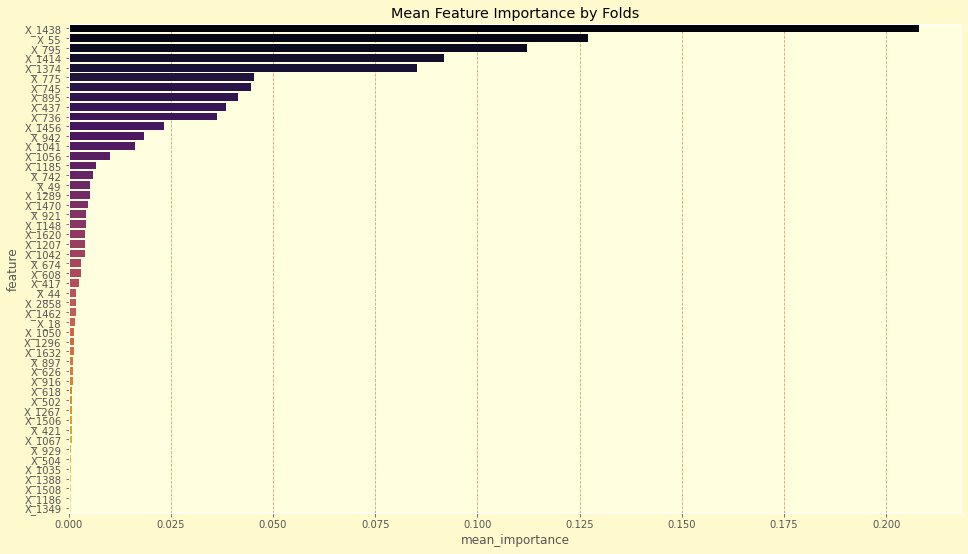

In [ ]:
feature_importances['mean_importance']=feature_importances[['importance_fold0+1','importance_fold1+1']].mean(axis=1)
feature_importances.sort_values(by='mean_importance', ascending=False, inplace=True)
sns.barplot(y=feature_importances['feature'][:50],x=feature_importances['mean_importance'][:50], palette='inferno')
plt.title('Mean Feature Importance by Folds')
plt.show()

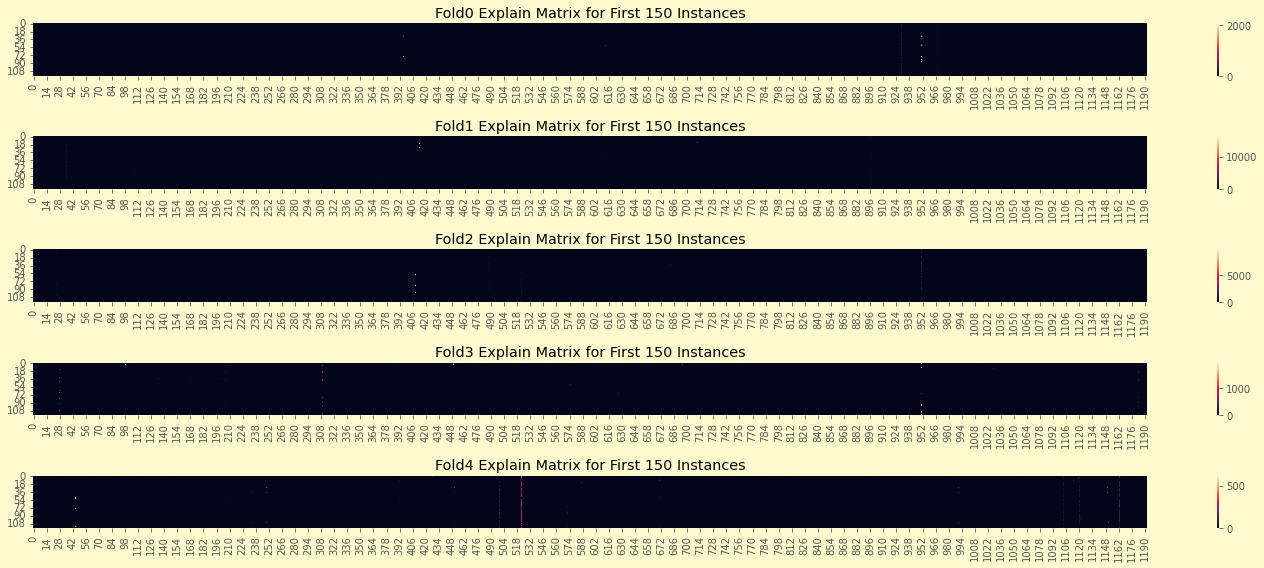

In [ ]:
fig, axs = plt.subplots(len(explain_matrices), 1, figsize=(20,8))
for i,matrix in enumerate(explain_matrices):
    axs[i].set_title(f'Fold{i} Explain Matrix for First 150 Instances')
    sns.heatmap(matrix[:150], ax=axs[i])
plt.tight_layout()

# 상관계수 확인

In [ ]:
train_x.iloc[:,:1192]

,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,X_13,X_15,...,X_2856,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865
0,6.2,97.1,10.9,45.0,10.0,31.0,505.85,511.47,498.64,0.0,...,181.60,139.60,131.646667,115.40,209.00,197.286667,189.00,383.0,368.296296,353.0
1,6.2,97.1,10.9,45.0,10.0,31.0,505.85,511.47,498.64,0.0,...,177.10,145.50,128.748276,119.70,198.00,193.296552,185.60,383.0,367.735849,353.0
2,6.2,97.1,10.9,45.0,10.0,31.0,505.85,511.47,498.64,0.0,...,183.60,128.00,115.365517,104.00,193.40,179.820690,165.50,383.0,367.320755,353.0
3,6.1,97.8,11.0,45.0,10.0,31.0,508.00,514.05,500.41,0.0,...,179.50,126.20,112.082759,94.50,190.30,181.920690,165.80,384.0,369.188679,353.0
4,6.1,97.8,11.0,45.0,10.0,31.0,508.00,514.05,500.41,0.0,...,188.00,152.10,138.066667,109.70,208.60,196.393333,182.60,383.0,367.351852,352.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,2.0,95.0,10.0,50.0,10.0,52.0,468.90,473.90,459.20,0.0,...,157.48,144.52,126.687655,112.74,180.28,171.567977,161.68,383.7,368.137352,351.7
594,6.2,98.1,11.0,45.0,10.0,31.0,503.13,508.79,495.61,0.0,...,168.20,185.10,159.527586,144.20,198.30,180.810345,168.70,384.0,369.811321,353.0
595,6.2,98.1,11.0,45.0,10.0,31.0,503.13,508.79,495.61,0.0,...,153.40,187.60,178.248276,159.60,186.50,176.486207,156.60,383.0,367.018868,352.0
596,40.0,94.0,11.0,45.0,10.0,31.0,505.80,510.90,497.10,0.0,...,157.48,144.52,126.687655,112.74,180.28,171.567977,161.68,383.7,368.137352,351.7


In [ ]:
X_group_train = train_x.iloc[:,:1192]
X_group_test = test_x.iloc[:,:1192]
#test_x.iloc[:,2:1848]

In [ ]:
train_y

0      1
1      2
2      1
3      2
4      1
      ..
593    1
594    0
595    0
596    1
597    1
Name: Y_Class, Length: 598, dtype: int64

In [ ]:
X_group_train['Y_Class'] = train_y; X_group_train

,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,X_13,X_15,...,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,Y_Class
0,6.2,97.1,10.9,45.0,10.0,31.0,505.85,511.47,498.64,0.0,...,139.60,131.646667,115.40,209.00,197.286667,189.00,383.0,368.296296,353.0,1
1,6.2,97.1,10.9,45.0,10.0,31.0,505.85,511.47,498.64,0.0,...,145.50,128.748276,119.70,198.00,193.296552,185.60,383.0,367.735849,353.0,2
2,6.2,97.1,10.9,45.0,10.0,31.0,505.85,511.47,498.64,0.0,...,128.00,115.365517,104.00,193.40,179.820690,165.50,383.0,367.320755,353.0,1
3,6.1,97.8,11.0,45.0,10.0,31.0,508.00,514.05,500.41,0.0,...,126.20,112.082759,94.50,190.30,181.920690,165.80,384.0,369.188679,353.0,2
4,6.1,97.8,11.0,45.0,10.0,31.0,508.00,514.05,500.41,0.0,...,152.10,138.066667,109.70,208.60,196.393333,182.60,383.0,367.351852,352.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,2.0,95.0,10.0,50.0,10.0,52.0,468.90,473.90,459.20,0.0,...,144.52,126.687655,112.74,180.28,171.567977,161.68,383.7,368.137352,351.7,1
594,6.2,98.1,11.0,45.0,10.0,31.0,503.13,508.79,495.61,0.0,...,185.10,159.527586,144.20,198.30,180.810345,168.70,384.0,369.811321,353.0,0
595,6.2,98.1,11.0,45.0,10.0,31.0,503.13,508.79,495.61,0.0,...,187.60,178.248276,159.60,186.50,176.486207,156.60,383.0,367.018868,352.0,0
596,40.0,94.0,11.0,45.0,10.0,31.0,505.80,510.90,497.10,0.0,...,144.52,126.687655,112.74,180.28,171.567977,161.68,383.7,368.137352,351.7,1


In [ ]:
corr = X_group_train.corr(method='pearson'); corr

,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,X_13,X_15,...,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,Y_Class
X_1,1.000000,0.135780,0.266400,-0.208639,-0.072145,-0.249786,0.103334,0.087103,0.124656,-0.016772,...,0.233607,0.240670,0.232461,0.113626,0.084880,0.053025,0.232470,0.229080,0.227643,0.007763
X_2,0.135780,1.000000,0.646256,-0.662246,-0.231448,-0.744886,0.400351,0.373100,0.461753,-0.098541,...,0.231433,0.240978,0.231463,0.096990,0.059541,0.021353,0.244489,0.242080,0.241645,-0.031145
X_5,0.266400,0.646256,1.000000,-0.773013,-0.228041,-0.854020,0.440216,0.402883,0.513865,-0.054562,...,0.313738,0.327762,0.315031,0.144928,0.094030,0.039688,0.335978,0.331396,0.329007,-0.015746
X_7,-0.208639,-0.662246,-0.773013,1.000000,0.350413,0.905146,-0.541016,-0.510941,-0.606252,0.040435,...,-0.291740,-0.302814,-0.290991,-0.130635,-0.091452,-0.051099,-0.305019,-0.301020,-0.299526,0.012935
X_8,-0.072145,-0.231448,-0.228041,0.350413,1.000000,0.267021,-0.144755,-0.139910,-0.153016,-0.007001,...,-0.086056,-0.089336,-0.086030,-0.039319,-0.027676,-0.015434,-0.089975,-0.088776,-0.088284,0.045866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X_2862,0.053025,0.021353,0.039688,-0.051099,-0.015434,-0.057159,0.053901,0.053672,0.055939,-0.003693,...,-0.018205,-0.031739,-0.043233,0.794572,0.920824,1.000000,-0.099392,-0.105601,-0.100946,0.037185
X_2863,0.232470,0.244489,0.335978,-0.305019,-0.089975,-0.336970,0.185043,0.165758,0.210227,-0.021528,...,0.859870,0.906049,0.919909,0.041265,-0.025752,-0.099392,1.000000,0.998874,0.996067,0.105076
X_2864,0.229080,0.242080,0.331396,-0.301020,-0.088776,-0.332516,0.182028,0.162853,0.206974,-0.021241,...,0.857525,0.903687,0.917876,0.036476,-0.031610,-0.105601,0.998874,1.000000,0.998169,0.104990
X_2865,0.227643,0.241645,0.329007,-0.299526,-0.088284,-0.330763,0.181307,0.162241,0.206048,-0.021123,...,0.854231,0.900512,0.915098,0.036497,-0.028689,-0.100946,0.996067,0.998169,1.000000,0.104724


In [ ]:
y_corr = corr[1192:]; y_corr

,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,X_13,X_15,...,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,Y_Class
Y_Class,0.007763,-0.031145,-0.015746,0.012935,0.045866,0.017185,0.037473,0.036918,0.031621,-0.001818,...,0.029211,0.041038,0.052846,0.045215,0.066563,0.037185,0.105076,0.10499,0.104724,1.0


In [ ]:
corr_y = y_corr.T; corr_y

,Y_Class
X_1,0.007763
X_2,-0.031145
X_5,-0.015746
X_7,0.012935
X_8,0.045866
...,...
X_2862,0.037185
X_2863,0.105076
X_2864,0.104990
X_2865,0.104724


In [ ]:
corr_y = corr_y.abs(); corr_y.describe()

,Y_Class
count,1.188000e+03
mean,6.458264e-02
std,5.557941e-02
min,2.154482e-07
25%,1.925878e-02
50%,4.991687e-02
75%,1.116460e-01
max,1.000000e+00


In [ ]:
corr_y = corr_y[corr_y>0.111646].dropna(axis=0); corr_y.T

,X_73,X_90,X_120,X_121,X_284,X_941,X_942,X_943,X_948,X_949,...,X_1697,X_2845,X_2846,X_2847,X_2848,X_2849,X_2850,X_2855,X_2856,Y_Class
Y_Class,0.157265,0.146422,0.161799,0.156704,0.114221,0.114044,0.114043,0.113813,0.128702,0.151688,...,0.132584,0.113293,0.113461,0.11325,0.15627,0.172656,0.171738,0.116398,0.134133,1.0


In [ ]:
corr_y.T.columns[:296]

Index(['X_73', 'X_90', 'X_120', 'X_121', 'X_284', 'X_941', 'X_942', 'X_943',
       'X_948', 'X_949',
       ...
       'X_1696', 'X_1697', 'X_2845', 'X_2846', 'X_2847', 'X_2848', 'X_2849',
       'X_2850', 'X_2855', 'X_2856'],
      dtype='object', length=296)

In [ ]:
use_columns = corr_y.T.columns[:296]

In [ ]:
use_columns

Index(['X_73', 'X_90', 'X_120', 'X_121', 'X_284', 'X_941', 'X_942', 'X_943',
       'X_948', 'X_949',
       ...
       'X_1696', 'X_1697', 'X_2845', 'X_2846', 'X_2847', 'X_2848', 'X_2849',
       'X_2850', 'X_2855', 'X_2856'],
      dtype='object', length=296)

In [ ]:
train_x = train_x[use_columns] 
test_x = test_x[use_columns] 

In [ ]:
train_x

,X_73,X_90,X_120,X_121,X_284,X_941,X_942,X_943,X_948,X_949,...,X_1696,X_1697,X_2845,X_2846,X_2847,X_2848,X_2849,X_2850,X_2855,X_2856
0,10.060,35.8,34.47,34.21,1.0,75.40,75.254839,75.10,54.258065,50.0,...,35.10,35.00,47.20,47.094444,47.00,39.0,32.722222,26.0,191.800000,181.60
1,10.060,35.8,34.47,34.21,1.0,75.50,75.278125,75.00,53.218750,50.0,...,35.10,35.00,47.10,47.084906,47.00,34.0,30.849057,27.0,188.755172,177.10
2,10.060,35.8,34.47,34.21,1.0,75.50,75.170968,75.00,52.451613,50.0,...,35.60,35.00,47.20,47.088679,47.00,35.0,30.603774,27.0,187.310345,183.60
3,10.033,35.7,34.55,34.30,1.0,75.30,75.125000,74.90,57.531250,50.0,...,35.10,35.00,47.20,47.105660,46.90,38.0,32.698113,27.0,187.203448,179.50
4,10.033,35.7,34.55,34.30,1.0,75.50,75.258065,75.10,50.000000,50.0,...,34.70,34.50,47.20,47.107407,47.00,36.0,32.888889,28.0,194.546667,188.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,10.090,36.0,34.40,34.10,1.3,76.10,75.893891,75.67,103.818347,98.6,...,37.24,36.56,47.32,47.141642,47.02,37.7,32.523270,27.2,169.287253,157.48
594,10.025,35.7,34.58,34.33,1.0,75.30,75.164516,75.00,54.322581,50.0,...,37.70,36.20,47.50,47.254717,47.10,35.0,31.188679,25.0,183.893103,168.20
595,10.025,35.7,34.58,34.33,1.0,75.40,75.138710,74.90,52.870968,50.0,...,37.30,34.90,47.50,47.220755,47.10,37.0,31.207547,25.0,176.975862,153.40
596,10.220,35.0,33.90,33.70,1.3,76.10,75.893891,75.67,103.818347,98.6,...,37.24,36.56,47.32,47.141642,47.02,37.7,32.523270,27.2,169.287253,157.48


# standardScaler

In [ ]:
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, TruncatedSVD, IncrementalPCA
from sklearn.decomposition import TruncatedSVD

In [ ]:
!pip install gauss_rank_scaler 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for gauss_rank_scaler: filename=gauss_rank_scaler-0.0.3-py3-none-any.whl size=5484 sha256=f420bd41919f83ddc161aeaa16009ef5537af9f27ef77fb60c7258b83f78f2bd
  Stored in directory: /root/.cache/pip/wheels/c7/72/c5/6fd18a744356daf5e54df450a6f056da564d3576ba41f6ad0c
Successfully built gauss_rank_scaler


In [ ]:
from gauss_rank_scaler import GaussRankScaler

ModuleNotFoundError: ignored

In [ ]:
scaler = GaussRankScaler()

NameError: ignored

In [ ]:
#train data 변환
X_group_train = scaler.fit_transform(train_x)

#test data 변환
X_group_test = scaler.transform(test_x)

In [ ]:
X_group_train = pd.DataFrame(X_group_train)
X_group_train.columns = train_x.columns
X_group_test = pd.DataFrame(X_group_test)
X_group_test.columns = test_x.columns

## LGBMClassifier

In [ ]:
lgbm = LGBMClassifier()

lgbm_param_grid = {
'n_estimators' : [100,200,300,400,500, 600],
'learning_rate' : [0.01,0.05,0.1],
'num_leaves': [6,8,12,16]  
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lgbm_grid=GridSearchCV(lgbm, param_grid = lgbm_param_grid, scoring="f1_macro", cv=5)
lgbm_grid.fit(X_group_train, train_y)

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 300, 400, 500, 600],
                         'num_leaves': [6, 8, 12, 16]},
             scoring='f1_macro')

In [ ]:
model = lgbm_grid.best_estimator_
pred = model.predict(X_group_test)

# 중요도 기반 변수 재생성

In [ ]:
importances = pd.DataFrame(model.feature_importances_,train_x.columns); importances

,0
X_73,1965
X_90,709
X_120,2011
X_121,1078
X_284,13
...,...
X_2848,0
X_2849,0
X_2850,0
X_2855,0


In [ ]:
importances.columns = ['importances'];importances

,importances
X_73,1965
X_90,709
X_120,2011
X_121,1078
X_284,13
...,...
X_2848,0
X_2849,0
X_2850,0
X_2855,0


In [ ]:
X_group_train.T

,0,1,2,3,4,5,6,7,8,9,...,588,589,590,591,592,593,594,595,596,597
X_73,0.534483,0.534483,0.534483,0.278293,0.278293,0.278293,0.278293,0.278293,0.278293,0.278293,...,0.819139,0.819139,0.819139,0.819139,1.767991,0.819139,0.202385,0.202385,2.052647,0.819139
X_90,-0.306783,-0.306783,-0.306783,-0.535531,-0.535531,-0.535531,-0.535531,-0.535531,-0.535531,-0.535531,...,0.150714,0.150714,0.150714,0.150714,-2.136768,0.150714,-0.535531,-0.535531,-2.136768,4.725678
X_120,-0.522280,-0.522280,-0.522280,-0.297040,-0.297040,-0.297040,-0.297040,-0.297040,-0.297040,-0.297040,...,-0.719365,-0.719365,-0.719365,-0.719365,-1.845565,-0.719365,-0.212575,-0.212575,-2.127115,-1.000915
X_121,-0.528290,-0.528290,-0.528290,-0.269765,-0.269765,-0.269765,-0.269765,-0.269765,-0.269765,-0.269765,...,-0.844265,-0.844265,-0.844265,-0.844265,-1.706015,-0.844265,-0.183590,-0.183590,-1.993265,-0.844265
X_284,-0.980711,-0.980711,-0.980711,-0.980711,-0.980711,-0.980711,-0.980711,-0.980711,-0.980711,-0.980711,...,0.253087,0.253087,0.253087,0.253087,0.253087,0.253087,-0.980711,-0.980711,0.253087,-0.158179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X_2848,0.682545,-2.933347,-2.210168,-0.040633,-1.486990,-2.210168,-2.210168,-0.763812,-2.210168,1.405723,...,-0.257587,-0.257587,-0.257587,-0.257587,-0.257587,-0.257587,-2.210168,-0.763812,-0.257587,-0.040633
X_2849,-0.229119,-1.482144,-1.646222,-0.245247,-0.117630,-1.482144,-1.789966,-0.358839,-1.740415,-0.253895,...,-0.362205,-0.362205,-0.362205,-0.362205,-0.362205,-0.362205,-1.254959,-1.242337,-0.362205,-0.285986
X_2850,-0.959295,-0.410182,-0.410182,-0.410182,0.138931,-0.410182,-0.959295,0.138931,-0.959295,0.138931,...,-0.300359,-0.300359,-0.300359,-0.300359,-0.300359,-0.300359,-1.508409,-1.508409,-0.300359,-0.355271
X_2855,1.146165,0.925232,0.820395,0.812638,1.345464,1.006049,0.559153,1.047583,0.447168,0.540529,...,-0.487365,-0.487365,-0.487365,-0.487365,-0.487365,-0.487365,0.572439,0.070522,-0.487365,-0.147820


In [ ]:
new_train_x  = X_group_train.T; new_train_x

,0,1,2,3,4,5,6,7,8,9,...,588,589,590,591,592,593,594,595,596,597
X_73,0.534483,0.534483,0.534483,0.278293,0.278293,0.278293,0.278293,0.278293,0.278293,0.278293,...,0.819139,0.819139,0.819139,0.819139,1.767991,0.819139,0.202385,0.202385,2.052647,0.819139
X_90,-0.306783,-0.306783,-0.306783,-0.535531,-0.535531,-0.535531,-0.535531,-0.535531,-0.535531,-0.535531,...,0.150714,0.150714,0.150714,0.150714,-2.136768,0.150714,-0.535531,-0.535531,-2.136768,4.725678
X_120,-0.522280,-0.522280,-0.522280,-0.297040,-0.297040,-0.297040,-0.297040,-0.297040,-0.297040,-0.297040,...,-0.719365,-0.719365,-0.719365,-0.719365,-1.845565,-0.719365,-0.212575,-0.212575,-2.127115,-1.000915
X_121,-0.528290,-0.528290,-0.528290,-0.269765,-0.269765,-0.269765,-0.269765,-0.269765,-0.269765,-0.269765,...,-0.844265,-0.844265,-0.844265,-0.844265,-1.706015,-0.844265,-0.183590,-0.183590,-1.993265,-0.844265
X_284,-0.980711,-0.980711,-0.980711,-0.980711,-0.980711,-0.980711,-0.980711,-0.980711,-0.980711,-0.980711,...,0.253087,0.253087,0.253087,0.253087,0.253087,0.253087,-0.980711,-0.980711,0.253087,-0.158179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X_2848,0.682545,-2.933347,-2.210168,-0.040633,-1.486990,-2.210168,-2.210168,-0.763812,-2.210168,1.405723,...,-0.257587,-0.257587,-0.257587,-0.257587,-0.257587,-0.257587,-2.210168,-0.763812,-0.257587,-0.040633
X_2849,-0.229119,-1.482144,-1.646222,-0.245247,-0.117630,-1.482144,-1.789966,-0.358839,-1.740415,-0.253895,...,-0.362205,-0.362205,-0.362205,-0.362205,-0.362205,-0.362205,-1.254959,-1.242337,-0.362205,-0.285986
X_2850,-0.959295,-0.410182,-0.410182,-0.410182,0.138931,-0.410182,-0.959295,0.138931,-0.959295,0.138931,...,-0.300359,-0.300359,-0.300359,-0.300359,-0.300359,-0.300359,-1.508409,-1.508409,-0.300359,-0.355271
X_2855,1.146165,0.925232,0.820395,0.812638,1.345464,1.006049,0.559153,1.047583,0.447168,0.540529,...,-0.487365,-0.487365,-0.487365,-0.487365,-0.487365,-0.487365,0.572439,0.070522,-0.487365,-0.147820


In [ ]:
importances.columns = ['im']; importances

,im
X_73,1965
X_90,709
X_120,2011
X_121,1078
X_284,13
...,...
X_2848,0
X_2849,0
X_2850,0
X_2855,0


In [ ]:
new_train_x = new_train_x.T.mul(importances['im'])

In [ ]:
new_train_x

,X_73,X_90,X_120,X_121,X_284,X_941,X_942,X_943,X_948,X_949,...,X_1696,X_1697,X_2845,X_2846,X_2847,X_2848,X_2849,X_2850,X_2855,X_2856
0,1050.259433,-217.508955,-1050.304945,-569.496733,-12.749246,-0.0,-26.333268,-15.284784,-134.615200,-65.726166,...,-37.014624,-64.322927,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0
1,1050.259433,-217.508955,-1050.304945,-569.496733,-12.749246,-0.0,-26.286681,-15.401793,-138.053935,-65.726166,...,-37.014624,-64.322927,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0
2,1050.259433,-217.508955,-1050.304945,-569.496733,-12.749246,-0.0,-26.501062,-15.401793,-140.592129,-65.726166,...,-26.710672,-64.322927,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0
3,546.845783,-379.691443,-597.347327,-290.806843,-12.749246,-0.0,-26.593025,-15.518801,-123.785352,-65.726166,...,-37.014624,-64.322927,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0
4,546.845783,-379.691443,-597.347327,-290.806843,-12.749246,-0.0,-26.326815,-15.284784,-148.703676,-65.726166,...,-45.257787,-97.101594,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,1609.607933,106.856020,-1446.642860,-910.117711,3.290128,-0.0,-25.054770,-14.617838,29.362781,21.332381,...,7.086294,37.946515,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
594,397.686183,-379.691443,-427.488220,-197.910212,-12.749246,-0.0,-26.513969,-15.401793,-134.401738,-65.726166,...,16.565930,14.345874,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0
595,397.686183,-379.691443,-427.488220,-197.910212,-12.749246,-0.0,-26.565598,-15.518801,-139.204628,-65.726166,...,8.322768,-70.878660,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
596,4033.451433,-1514.968859,-4277.627972,-2148.739448,3.290128,-0.0,-25.054770,-14.617838,29.362781,21.332381,...,7.086294,37.946515,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [ ]:
new_test_x = X_group_test*importances['im']; new_test_x

,X_73,X_90,X_120,X_121,X_284,X_941,X_942,X_943,X_948,X_949,...,X_1696,X_1697,X_2845,X_2846,X_2847,X_2848,X_2849,X_2850,X_2855,X_2856
0,2168.956433,106.856020,-2012.839883,-1219.773145,3.290128,-0.0,-25.054770,-14.617838,29.362781,21.332381,...,7.086294,37.946515,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1,4033.451433,-1514.968859,-4277.627972,-2148.739448,3.290128,-0.0,-25.054770,-14.617838,29.362781,21.332381,...,7.086294,37.946515,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2,4033.451433,-1514.968859,-3711.430950,-2148.739448,3.290128,-0.0,-25.054770,-14.617838,29.362781,21.332381,...,7.086294,37.946515,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
3,546.845783,-379.691443,-597.347327,-290.806843,-12.749246,0.0,91.509422,53.515999,-30.029616,-39.214509,...,6.261977,-44.655727,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
4,546.845783,-379.691443,-597.347327,-290.806843,-12.749246,0.0,91.668342,53.515999,-35.961184,-40.110173,...,6.261977,-77.434394,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,-2865.180067,106.856020,3082.933319,1567.125763,3.290128,-0.0,-25.054770,-14.617838,29.362781,21.332381,...,7.086294,37.946515,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
306,-68.437567,106.856020,251.948207,18.848592,3.290128,-0.0,-25.054770,-14.617838,29.362781,21.332381,...,7.086294,37.946515,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
307,-2865.180067,106.856020,3082.933319,1567.125763,3.290128,-0.0,-25.054770,-14.617838,29.362781,21.332381,...,7.086294,37.946515,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
308,-2305.831567,106.856020,1950.539274,1257.470329,3.290128,-0.0,-25.054770,-14.617838,29.362781,21.332381,...,7.086294,37.946515,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [ ]:
lgbm_grid.fit(new_train_x, train_y)

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 300, 400, 500, 600],
                         'num_leaves': [6, 8, 12, 16]},
             scoring='f1_macro')

In [ ]:
model = lgbm_grid.best_estimator_
pred_group_1 = model.predict(new_test_x)

# INFERENCE

In [ ]:
%cd /content/drive/MyDrive/스마트공장

/content/drive/MyDrive/스마트공장


In [ ]:
submit = pd.read_csv('/content/drive/MyDrive/스마트공장/sample_submission (3).csv')

In [ ]:
test_predictions

array([0.56636245, 0.57440425, 0.7747038 , 0.64307668, 0.59987435,
       0.40017051, 0.79994291, 0.56821321, 0.9730362 , 0.79995239,
       0.40001854, 0.59790602, 0.59999114, 0.77734302, 0.97380726,
       0.95240128, 0.67119878, 0.90427022, 0.37589153, 0.77610913,
       0.7512383 , 0.77617695, 0.77446946, 0.77533486, 0.71650531,
       0.77030558, 0.48767569, 0.75817947, 0.95394434, 0.76121615,
       0.76975543, 0.57346165, 0.3893635 , 0.77396175, 0.57385644,
       0.97100222, 0.97531982, 0.4000041 , 0.12975962, 0.79993576,
       0.59986724, 0.79999477, 0.77794062, 0.35358632, 0.28661984,
       0.57542302, 0.77724603, 0.77007731, 0.97427931, 0.60237066,
       0.76580809, 0.77023471, 0.80000001, 0.97791453, 0.5713799 ,
       0.69722096, 0.77473205, 0.75588892, 0.7692482 , 0.56045762,
       0.62938311, 0.97309534, 0.97416703, 0.79999514, 0.82752188,
       0.78078942, 0.78060286, 0.72355425, 0.74020086, 0.76671548,
       0.7179243 , 0.79995677, 0.72258652, 0.76944749, 0.52964

In [ ]:
submit['Y_Class'] = pred_group_1

In [ ]:
submit.to_csv('0219preds_1.csv', index=False)

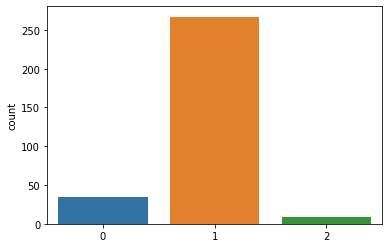

In [ ]:
sns.countplot(pred_group_1)

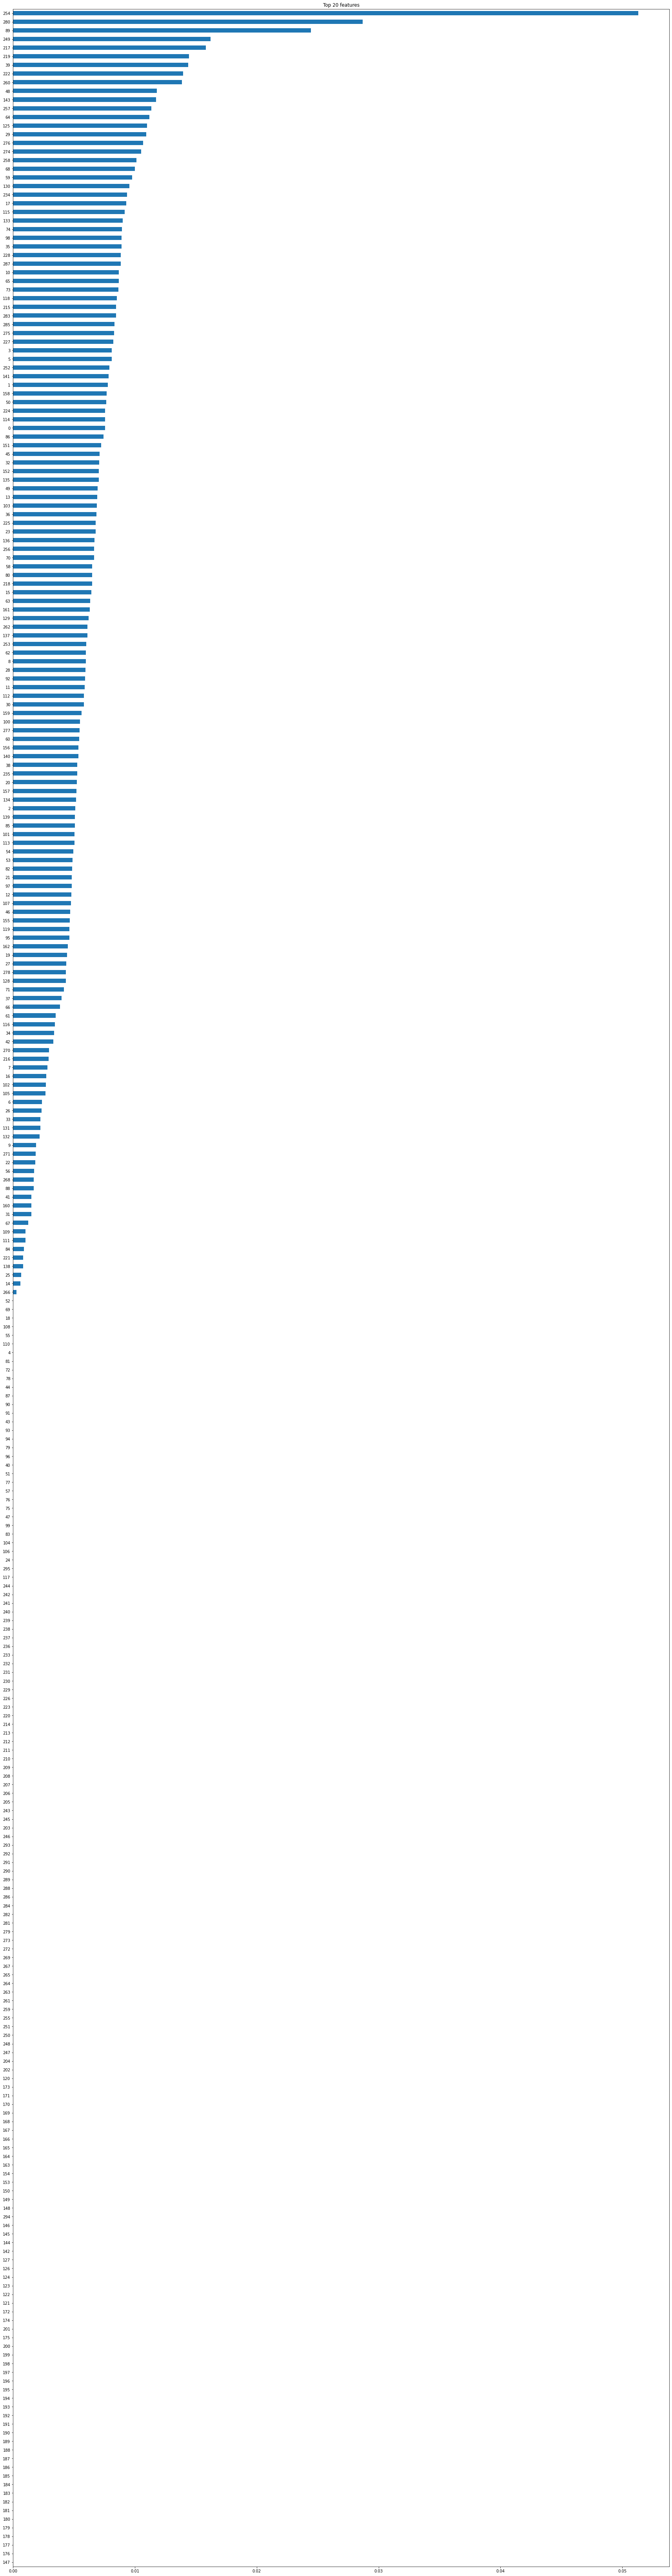

In [ ]:
model.feature_importances_

importances = pd.Series(model.feature_importances_, X_group_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n=20
plt.figure(figsize=(30,120))
plt.title(f'Top {n} features')
importances.sort_values().plot.barh()

In [ ]:
importances = pd.Series(model.feature_importances_, X_group_train.columns);importances

0      0.007539
1      0.007764
2      0.005114
3      0.008108
4      0.000000
         ...   
291    0.000000
292    0.000000
293    0.000000
294    0.000000
295    0.000000
Length: 296, dtype: float32

In [ ]:
pd.DataFrame(importances.sort_values(ascending=False))

,0
4,1320
2,1012
5,572
3,307
76,70
...,...
218,0
217,0
216,0
215,0


In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 13.0 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=b34b98bc8433433dd6441ae39b362607052b66e522af3c92c86ca6f82ef0b118
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib